In [2]:
#CIFAR-100 dataset
import tensorflow as tf
import numpy as np
import cv2
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

# Modify the training and test data
def resize_and_pad(image, scale_factor=0.51):
    height, width, channels = image.shape
    new_height = int(height * scale_factor)
    new_width = int(width * scale_factor)

    # Resize the image
    resized_image = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_AREA)

    # Calculate the padding required to maintain the original aspect ratio
    pad_height = (height - new_height) // 2
    pad_width = (width - new_width) // 2

    # Create a new padded image with the same size as the original image
    padded_image = np.zeros((height, width, channels), dtype=np.uint8)

    # Paste the resized image onto the padded image
    padded_image[pad_height:pad_height+new_height, pad_width:pad_width+new_width] = resized_image

    return padded_image

# Modify the training and test data
x_train_modified = np.array([resize_and_pad(image) for image in x_train])
x_test_modified = np.array([resize_and_pad(image) for image in x_test])

# Preprocess the data
x_train = x_train / 255.0
x_test = x_test / 255.0
x_train_modified = x_train_modified / 255.0
x_test_modified = x_test_modified / 255.0

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes=100)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=100)

# Define the model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(100, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model on the original CIFAR-100 dataset
model.fit(x_train, y_train, epochs=100, batch_size=64, validation_split=0.2)

# Evaluate the model on the original CIFAR-100 dataset
original_on_original_scores = model.evaluate(x_test, y_test, verbose=0)
print(f'Model trained on original, tested on original CIFAR-100 test accuracy: {original_on_original_scores[1] * 100:.2f}%')

# Evaluate the model on the modified CIFAR-100 dataset
original_on_modified_scores = model.evaluate(x_test_modified, y_test, verbose=0)
print(f'Model trained on original, tested on modified CIFAR-100 test accuracy: {original_on_modified_scores[1] * 100:.2f}%')

# Train a new model on the modified CIFAR-100 dataset
model_modified = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(100, activation='softmax')
])

model_modified.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
model_modified.fit(x_train_modified, y_train, epochs=100, batch_size=64, validation_split=0.2)

# Evaluate the modified model on the original CIFAR-100 dataset
modified_on_original_scores = model_modified.evaluate(x_test, y_test, verbose=0)
print(f'Model trained on modified, tested on original CIFAR-100 test accuracy: {modified_on_original_scores[1] * 100:.2f}%')

# Evaluate the modified model on the modified CIFAR-100 dataset
modified_on_modified_scores = model_modified.evaluate(x_test_modified, y_test, verbose=0)
print(f'Model trained on modified, tested on modified CIFAR-100 test accuracy: {modified_on_modified_scores[1] * 100:.2f}%')




Epoch 1/100


625/625 [==============================] - 14s 20ms/step - loss: 4.1665 - accuracy: 0.0622 - val_loss: 3.8030 - val_accuracy: 0.1220
Epoch 2/100
625/625 [==============================] - 11s 18ms/step - loss: 3.6081 - accuracy: 0.1491 - val_loss: 3.5200 - val_accuracy: 0.1624
Epoch 3/100
625/625 [==============================] - 11s 18ms/step - loss: 3.3173 - accuracy: 0.1966 - val_loss: 3.2511 - val_accuracy: 0.2106
Epoch 4/100
625/625 [==============================] - 13s 20ms/step - loss: 3.1199 - accuracy: 0.2342 - val_loss: 3.1132 - val_accuracy: 0.2360
Epoch 5/100
625/625 [==============================] - 12s 19ms/step - loss: 2.9699 - accuracy: 0.2637 - val_loss: 2.9819 - val_accuracy: 0.2602
Epoch 6/100
625/625 [==============================] - 12s 20ms/step - loss: 2.8410 - accuracy: 0.2886 - val_loss: 2.9125 - val_accuracy: 0.2751
Epoch 7/100
625/625 [==============================] - 13s 20ms/step - loss: 2.7385 - accuracy: 0.3099 - val_loss: 2.8780 - v

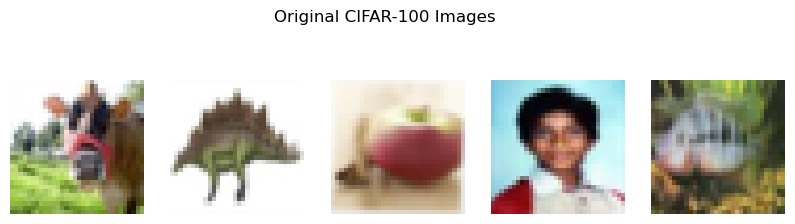

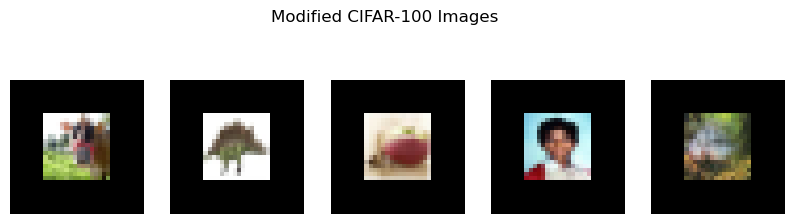

In [6]:
#CIFAR-100 dataset
import matplotlib.pyplot as plt

# Function to plot images without labels
def plot_images(images, title):
    plt.figure(figsize=(10, 5))
    for i in range(5):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i])
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

# Plot some images from the original CIFAR-100 dataset without labels
plot_images(x_train[:10], title='Original CIFAR-100 Images')

# Plot some images from the modified CIFAR-100 dataset without labels
plot_images(x_train_modified[:10], title='Modified CIFAR-100 Images')

In [8]:
import tensorflow as tf
import numpy as np
import cv2
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

# Modify the training and test data
def resize_and_pad(image, scale_factor=0.51):
    height, width, channels = image.shape
    new_height = int(height * scale_factor)
    new_width = int(width * scale_factor)

    # Resize the image
    resized_image = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_AREA)

    # Calculate the padding required to maintain the original aspect ratio
    pad_height = (height - new_height) // 2
    pad_width = (width - new_width) // 2

    # Create a new padded image with the same size as the original image
    padded_image = np.zeros((height, width, channels), dtype=np.uint8)

    # Paste the resized image onto the padded image
    padded_image[pad_height:pad_height+new_height, pad_width:pad_width+new_width] = resized_image

    return padded_image

# Modify the training and test data
x_train_modified = np.array([resize_and_pad(image) for image in x_train])
x_test_modified = np.array([resize_and_pad(image) for image in x_test])

# Preprocess the data
x_train = x_train / 255.0
x_test = x_test / 255.0
x_train_modified = x_train_modified / 255.0
x_test_modified = x_test_modified / 255.0

# Concatenate the original and modified data
x_train_combined = np.concatenate((x_train, x_train_modified), axis=0)
y_train_combined = np.concatenate((y_train, y_train), axis=0)

# Convert labels to one-hot encoding
y_train_combined = tf.keras.utils.to_categorical(y_train_combined, num_classes=100)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=100)

# Define the model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(100, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model on the combined dataset
model.fit(x_train_combined, y_train_combined, epochs=100, batch_size=64, validation_split=0.2)

# Evaluate the model on the original CIFAR-100 dataset
original_on_original_scores = model.evaluate(x_test, y_test, verbose=0)
print(f'Model trained on combined, tested on original CIFAR-100 test accuracy: {original_on_original_scores[1] * 100:.2f}%')

# Evaluate the model on the modified CIFAR-100 dataset
original_on_modified_scores = model.evaluate(x_test_modified, y_test, verbose=0)
print(f'Model trained on combined, tested on modified CIFAR-100 test accuracy: {original_on_modified_scores[1] * 100:.2f}%')


Epoch 1/100
1250/1250 [==============================] - 49s 36ms/step - loss: 3.9372 - accuracy: 0.0965 - val_loss: 3.5365 - val_accuracy: 0.1651
Epoch 2/100
1250/1250 [==============================] - 47s 38ms/step - loss: 3.3156 - accuracy: 0.1999 - val_loss: 3.2012 - val_accuracy: 0.2197
Epoch 3/100
1250/1250 [==============================] - 64s 51ms/step - loss: 3.0251 - accuracy: 0.2549 - val_loss: 3.0131 - val_accuracy: 0.2566
Epoch 4/100
1250/1250 [==============================] - 50s 40ms/step - loss: 2.8314 - accuracy: 0.2938 - val_loss: 2.9026 - val_accuracy: 0.2819
Epoch 5/100
1250/1250 [==============================] - 57s 46ms/step - loss: 2.6840 - accuracy: 0.3229 - val_loss: 2.7964 - val_accuracy: 0.3001
Epoch 6/100
1250/1250 [==============================] - 60s 48ms/step - loss: 2.5748 - accuracy: 0.3443 - val_loss: 2.7490 - val_accuracy: 0.3126
Epoch 7/100
1250/1250 [==============================] - 64s 51ms/step - loss: 2.4803 - accuracy: 0.3606 - val_loss: 2